In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('Data/4105819v2474763.csv', index_col=0)
df

,lpt odds,r1 spread,r1 pup,r2 spread,r2 pup,r1_sets_to_win,r2_sets_to_win,enhanced_markov
2018-07-11 16:36:42,0.582314,0.005831,0.076386,0.016807,0.002012,3.0,3.0,0.507162
2018-07-11 16:36:44,0.582350,0.005831,0.076386,0.016807,0.002012,3.0,3.0,0.507162
2018-07-11 16:36:46,0.582387,0.005831,0.074565,0.024288,0.002396,3.0,3.0,0.507162
2018-07-11 16:36:48,0.582423,0.005831,0.072341,0.029768,0.003003,3.0,3.0,0.507162
2018-07-11 16:36:50,0.582460,0.005831,0.070063,0.032151,0.003397,3.0,3.0,0.507162
...,...,...,...,...,...,...,...,...
2018-07-11 19:32:56,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:32:58,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:33:00,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:33:02,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000


In [4]:
data = df.to_numpy()
data

array([[0.58231363, 0.0058309 , 0.07638615, ..., 3.        , 3.        ,
        0.50716188],
       [0.58235018, 0.0058309 , 0.07638615, ..., 3.        , 3.        ,
        0.50716188],
       [0.58238673, 0.0058309 , 0.07456494, ..., 3.        , 3.        ,
        0.50716188],
       ...,
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ],
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ],
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ]])

In [5]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

In [18]:
model, history = seq2seq_model.convlstm_seq2seq_fit(train, n_length=90, n_steps=3, features_list=range(1), features=8)
model.summary()

Epoch 1/10
31/31 [==============================] - 11s 286ms/step - loss: 0.0207 - mae: 0.1156
Epoch 2/10
31/31 [==============================] - 9s 290ms/step - loss: 0.0079 - mae: 0.0715
Epoch 3/10
31/31 [==============================] - 9s 287ms/step - loss: 0.0049 - mae: 0.0539
Epoch 4/10
31/31 [==============================] - 9s 287ms/step - loss: 0.0038 - mae: 0.0463
Epoch 5/10
31/31 [==============================] - 9s 289ms/step - loss: 0.0031 - mae: 0.0412
Epoch 6/10
31/31 [==============================] - 9s 285ms/step - loss: 0.0029 - mae: 0.0394
Epoch 7/10
31/31 [==============================] - 9s 287ms/step - loss: 0.0024 - mae: 0.0361
Epoch 8/10
31/31 [==============================] - 9s 285ms/step - loss: 0.0023 - mae: 0.0346
Epoch 9/10
31/31 [==============================] - 9s 283ms/step - loss: 0.0020 - mae: 0.0320
Epoch 10/10
31/31 [==============================] - 9s 284ms/step - loss: 0.0021 - mae: 0.0323
Model: "sequential_2"
__________________________

In [20]:
model.save("seq2seq_model", save_format='tf')

INFO:tensorflow:Assets written to: seq2seq_model/assets


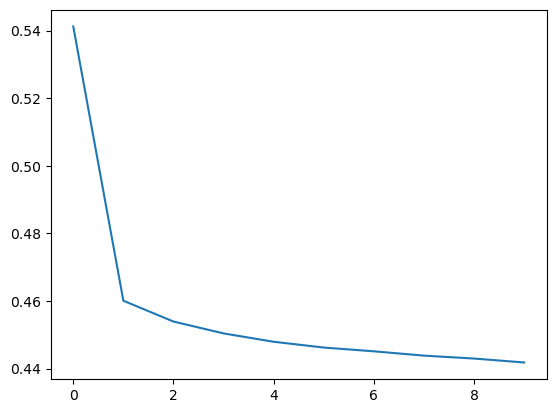

In [9]:
plt.plot(history.history['mae'])

In [22]:
model = load_model("seq2seq_model")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_2 (ConvLSTM2D)  (None, 1, 88, 64)         55552     
                                                                 
 flatten_2 (Flatten)         (None, 5632)              0         
                                                                 
 repeat_vector_2 (RepeatVect  (None, 90, 5632)         0         
 or)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 90, 200)           4666400   
                                                                 
 time_distributed_4 (TimeDis  (None, 90, 100)          20100     
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 90, 8)           

(1045980, 8)
(270, 8)
1/1 [==============================] - 0s 22ms/step
[0.47880495 0.43986052 0.39848635 0.37410286 0.35672984 0.3431468
 0.33189964 0.32254255 0.31491628 0.30849543 0.30304113 0.2984368
 0.29454926 0.29127175 0.2885166  0.28633678 0.28458166 0.28314027
 0.28197315 0.2815779  0.28145212 0.28144598 0.28153405 0.28169408
 0.28190663 0.28215453 0.28242233 0.28269818 0.28297085 0.28322503
 0.28345641 0.2836634  0.28384557 0.28400344 0.28413808 0.28425136
 0.2843455  0.2844225  0.2844847  0.28453434 0.2845737  0.28460452
 0.28462875 0.2846479  0.28466326 0.28467605 0.2846872  0.2846974
 0.2847075  0.2847176  0.28472817 0.28473943 0.2847517  0.28476465
 0.2847785  0.28479317 0.28480858 0.2848246  0.2848412  0.28485796
 0.28487515 0.28489238 0.28490952 0.2849267  0.28494355 0.2849601
 0.2849762  0.28499192 0.285007   0.28502172 0.2850356  0.285049
 0.28506175 0.28507388 0.2850853  0.2850961  0.28510627 0.28511572
 0.28512484 0.28513315 0.285141   0.28514835 0.2851551  0.285

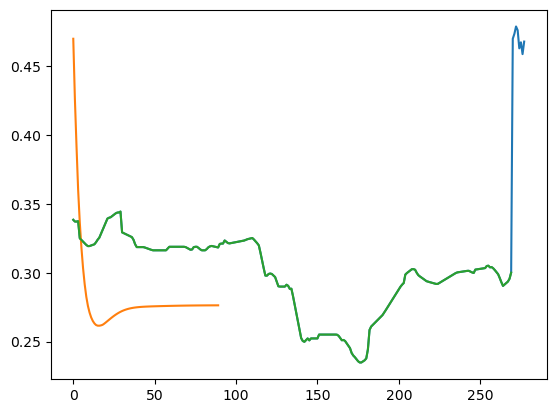

In [32]:
test_x, test_y = seq2seq_model.truncate_data(train, 270, 90, features=range(1))
yhat = seq2seq_model.make_forecast(model, test_x, features=range(8))
print(yhat[:, 2])
plt.plot(yhat[:, 0])
plt.plot(test_x[-1, :, 0])
# y = np.concatenate((test_x[-1, :, 0], yhat[:, 0])

In [7]:
print(predictions.shape)
print(test_out.shape)
print(test_in.shape)
print(len(data))
print(3459 + 3459)
mae = mae(test_out, predictions)
mse = mae**2
rmse = np.sqrt(mse)
print("The mae for this prediction is: " + str(mae))
print("The mse for this prediction is: " + str(mse))
print("The rmse for this prediction is: " + str(rmse))

(1415, 105, 5)
(1415, 105, 5)
(1415, 525, 5)
10220
6918


ValueError: Found array with dim 3. None expected <= 2.

In [8]:
validation = df[math.ceil( len(df) * 0.8 ):]
df_pred = pd.DataFrame(predictions, columns = ['pred odds', 'pred r1 spread', 'pred r1 pup', 'pred r2 spread', 'pred r2 pup'])
df_pred.index = validation.index
validation = pd.concat([validation,df_pred],axis=1)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time')
plt.ylabel('Implied Probabilities')
plt.plot(validation[['avg','pred odds']])
plt.legend(['Measured values', 'Predictions'], loc='lower right')
plt.show()

ValueError: Must pass 2-d input. shape=(3459, 105, 5)